#### Import libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
%matplotlib inline
from matplotlib import pyplot
import seaborn as sns

import random


### Exploratory data analysis

In [3]:
# Read data set 

df = pd.read_excel("Data/Online_Retail.xlsx")

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
df.info()

# The data set contains of 541.909 rows and 8 columns
# For attribute description, see the readme in my repository 
# Keep all the columns as they all contain necessary data. Moreover, later we gonna add some columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [6]:
df.dtypes

# All data types look good. Later I might seperate the time from the date, in order to analyse the customer shopping behaviour

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [7]:
df.nunique()

print("There are " + str(df.InvoiceNo.nunique()) + " unique orders.")
print("There are " + str(df.StockCode.nunique()) + " unique products.")
print("There are " + str(df.CustomerID.nunique()) + " unique customers.")
print("The customers are from " + str(df.Country.nunique()) + " different countries.")

There are 25900 unique orders.
There are 4070 unique products.
There are 4372 unique customers.
The customers are from 38 different countries.


In [8]:
df.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

In [9]:
df.InvoiceNo.value_counts(dropna=False)

# There is an invoice number which appears 1114 times. This means, one purchase contains 1114 articles 

573585     1114
581219      749
581492      731
580729      721
558475      705
           ... 
554023        1
554022        1
554021        1
554020        1
C558901       1
Name: InvoiceNo, Length: 25900, dtype: int64

In [10]:
df.StockCode.value_counts(dropna=False)

# A product that has been sold 2313 times 

85123A    2313
22423     2203
85099B    2159
47566     1727
20725     1639
          ... 
21431        1
22275        1
17001        1
90187A       1
72759        1
Name: StockCode, Length: 4070, dtype: int64

In [11]:
df.CustomerID.value_counts(dropna=False)

# 135.080 rows with missing customerIDs. That´s a lot! (might drop them later)

NaN        135080
17841.0      7983
14911.0      5903
14096.0      5128
12748.0      4642
            ...  
13270.0         1
17763.0         1
17291.0         1
15668.0         1
15562.0         1
Name: CustomerID, Length: 4373, dtype: int64

In [12]:
df.describe()

# There are negative unit prices and quantity (in case of cancellation). To be removed
# There are ouliters in quantity and unit price that have to be removed

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [13]:
df['Description'].value_counts().head()

# Which items were sold most often

WHITE HANGING HEART T-LIGHT HOLDER    2369
REGENCY CAKESTAND 3 TIER              2200
JUMBO BAG RED RETROSPOT               2159
PARTY BUNTING                         1727
LUNCH BAG RED RETROSPOT               1638
Name: Description, dtype: int64

### Data cleaning 

##### Null Values 

In [15]:
df.isnull().sum().sort_values(ascending=False)

CustomerID     135080
Description      1454
InvoiceNo           0
StockCode           0
Quantity            0
InvoiceDate         0
UnitPrice           0
Country             0
dtype: int64

In [16]:
# drop null values in customer id and description.(nulls in description also have no customer and price, so not needed) We can´t work with null-customers 

df.CustomerID.isnull().values.sum()

135080

In [17]:
df.Description.isnull().values.sum()

1454

In [18]:
df_clean = df.dropna()

In [19]:
df_clean.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [20]:
df_clean.isna().sum()

# Check if there are missing values in the new dataframe

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

##### Duplicates

In [21]:
df_clean[df_clean.duplicated()].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom


In [22]:
df_clean.duplicated().sum()

# In the whole df_clean there are 5225 duplicates. These will be dropped.

5225

In [23]:
df_clean.drop_duplicates(inplace=True)

C:\Users\admin\anaconda3\envs\DA_env\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [24]:
df_clean.duplicated().sum()

0

In [25]:
df_clean.shape

# After dropping dublicates and null values the data set has about 100.000 less rows. Now it´s 401.604

(401604, 8)

##### Drop Negative Values 

In [26]:
(df_clean["Quantity"] <= 0).sum()

# There are 8872 transactions with a negative quantity of items. These might be cancellations. Eventhough it would be interesting to analyse the cancellations, for now we drop them

8872

In [27]:
df_clean.loc[df_clean["Quantity"] < 0].count()

InvoiceNo      8872
StockCode      8872
Description    8872
Quantity       8872
InvoiceDate    8872
UnitPrice      8872
CustomerID     8872
Country        8872
dtype: int64

In [28]:
df_clean = df_clean[df_clean["Quantity"] > 0]

In [29]:
df_clean.shape

(392732, 8)

In [30]:
(df_clean["UnitPrice"] <= 0).sum()

# There are 40 transactions where the price per unit is equal/belove 0. These might be mistakes, or maybe free items? E.g. from marketing actions like "buy 2, get 3" or similar. We don´t need them

40

In [31]:
df_clean = df_clean[df_clean["UnitPrice"] > 0]

In [32]:
df_clean.shape

(392692, 8)

In [33]:
# Dropping invoices for cancellations(starting with "C") might be an additional step, to be sure. 
# But with the removing of negative quantity values, the cancellations for sure have all been removed (and with that also other mistaken quantity rows)

##### Data Type

In [34]:
df_clean = df_clean.astype({"CustomerID":"int"})

# Change data type of CustomerID from float to integer

In [35]:
df_clean.CustomerID.dtypes

dtype('int32')

#### Feature Engineering

In [36]:
# The data set contains information for the amount of items per purchase(invoice) and the proce per unit. 
# Add a column with the whole value of a purchase "TotalAmount"

In [47]:
df_clean["TotalAmount"] = df_clean["Quantity"] * df_clean["UnitPrice"]

In [54]:
df_clean =df_clean[["InvoiceNo", "InvoiceDate", "StockCode", "Description", "Quantity", "UnitPrice", "TotalAmount", "CustomerID", "Country"]]
df_clean.head()

,InvoiceNo,InvoiceDate,StockCode,Description,Quantity,UnitPrice,TotalAmount,CustomerID,Country
0,536365,2010-12-01 08:26:00,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.30,17850,United Kingdom
1,536365,2010-12-01 08:26:00,71053,WHITE METAL LANTERN,6,3.39,20.34,17850,United Kingdom
2,536365,2010-12-01 08:26:00,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,22.00,17850,United Kingdom
3,536365,2010-12-01 08:26:00,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,20.34,17850,United Kingdom
4,536365,2010-12-01 08:26:00,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,20.34,17850,United Kingdom


In [52]:
df_clean.TotalAmount.dtype

dtype('float64')

##### Customers and the number of their orders

In [41]:
df_purchases = df_clean.groupby(["CustomerID", "InvoiceNo"]).agg({
    "TotalAmount": sum,
    "InvoiceDate": max,
})

# To analyse the customers shopping behaviour, the purchases (invoice number) will be aggregated. Thus it´s clear how many times a customer bought sth. and how often. Create new df for that 

In [42]:
df_purchases.head()

TotalAmount         InvoiceDate
CustomerID InvoiceNo                                 
12346      541431        77183.60 2011-01-18 10:01:00
12347      537626          711.79 2010-12-07 14:57:00
           542237          475.39 2011-01-26 14:30:00
           549222          636.25 2011-04-07 10:43:00
           556201          382.52 2011-06-09 13:01:00

In [53]:
df_clean.describe()

,Quantity,UnitPrice,TotalAmount,CustomerID
count,392692.000000,392692.000000,392692.000000,392692.000000
mean,13.119702,3.125914,22.631500,15287.843865
std,180.492832,22.241836,311.099224,1713.539549
min,1.000000,0.001000,0.001000,12346.000000
25%,2.000000,1.250000,4.950000,13955.000000
50%,6.000000,1.950000,12.450000,15150.000000
75%,12.000000,3.750000,19.800000,16791.000000
max,80995.000000,8142.750000,168469.600000,18287.000000


### Visual EDA 

C:\Users\admin\anaconda3\envs\DA_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


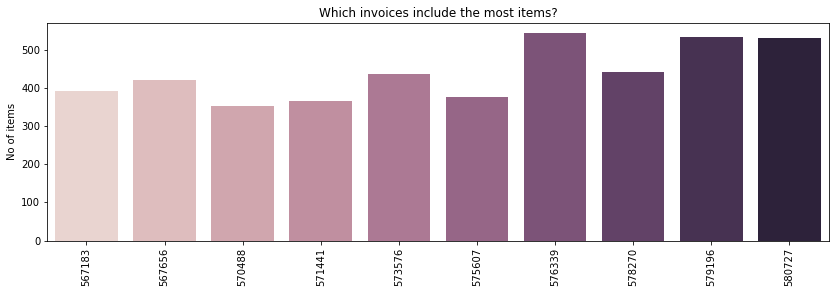

In [77]:
invoice_count = df_clean["InvoiceNo"].value_counts().sort_values(ascending=False).iloc[0:10]
plt.figure(figsize =(14,4))
sns.barplot(invoice_count.index, invoice_count.values, palette = sns.cubehelix_palette(10))
plt.ylabel("No of items")
plt.title("Which invoices include the most items?");
plt.xticks(rotation = 90);

C:\Users\admin\anaconda3\envs\DA_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


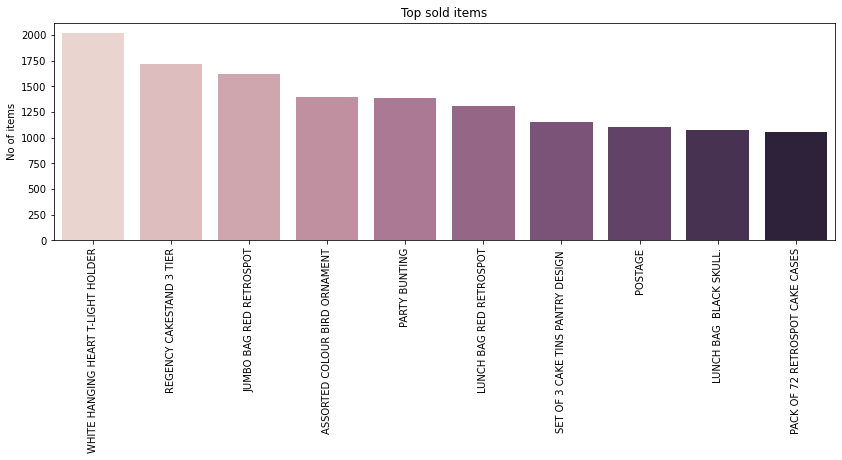

In [84]:
item_count = df_clean["Description"].value_counts().sort_values(ascending=False).iloc[0:10]
plt.figure(figsize = (14,4))
sns.barplot(item_count.index, item_count.values, palette = sns.cubehelix_palette(10))
plt.ylabel("No of items")
plt.title("Top sold items");
plt.xticks(rotation = 90);

#### Save data to excel

In [100]:
df_clean.to_excel('df_retail.xlsx', index=False)

In [101]:
df_purchases.to_excel('df_purchases.xlsx', index=False)